In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/ckdisease/kidney_disease.csv')

In [3]:
df.head(20)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [4]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<Axes: >

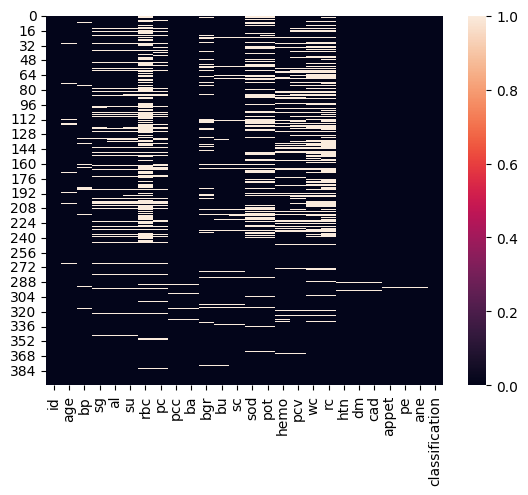

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.shape

(400, 26)

In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['rbc']=lb.fit_transform(df['rbc'])
df['pc']=lb.fit_transform(df['pc'])
df['pcc']=lb.fit_transform(df['pcc'])
df['ba']=lb.fit_transform(df['ba'])
df['htn']=lb.fit_transform(df['htn'])
df['dm']=lb.fit_transform(df['dm'])
df['cad']=lb.fit_transform(df['cad'])
df['appet']=lb.fit_transform(df['appet'])
df['pe']=lb.fit_transform(df['pe'])
df['ane']=lb.fit_transform(df['ane'])
df['classification']=lb.fit_transform(df['classification'])


In [10]:
# Replace Blank values with DataFrame.replace() methods.

print(df)


      id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  pcv    wc   rc  \
0      0  48.0  80.0  1.020  1.0  0.0    2   1    0   0  ...   44  7800  5.2   
1      1   7.0  50.0  1.020  4.0  0.0    2   1    0   0  ...   38  6000  NaN   
2      2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  ...   31  7500  NaN   
3      3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...   32  6700  3.9   
4      4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  ...   35  7300  4.6   
..   ...   ...   ...    ...  ...  ...  ...  ..  ...  ..  ...  ...   ...  ...   
395  395  55.0  80.0  1.020  0.0  0.0    1   1    0   0  ...   47  6700  4.9   
396  396  42.0  70.0  1.025  0.0  0.0    1   1    0   0  ...   54  7800  6.2   
397  397  12.0  80.0  1.020  0.0  0.0    1   1    0   0  ...   49  6600  5.4   
398  398  17.0  60.0  1.025  0.0  0.0    1   1    0   0  ...   51  7200  5.9   
399  399  58.0  80.0  1.025  0.0  0.0    1   1    0   0  ...   53  6800  6.1   

     htn  dm  cad appet pe ane  classif

In [11]:
df['age']=df['age'].fillna(df['age'].mean()) 

In [12]:
df.replace('\t?', float('nan'), inplace=True)  # Replace '\t?' with NaN

# Convert the relevant columns to float
columns_to_convert = [ 'bp',     'sg',   'al' ,  'su',  'rbc',  'pc',  'pcc' , 'ba'  ,'bgr', 'bu', 'sc', 'sod', 'pot' ,'hemo' ,'pcv' , 'wc' , 'rc' ,'htn',  'dm'  ,'cad',  'appet' , 'pe' , 'ane' , 'classification']  # Replace with the actual column names
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

In [13]:
!pip install fancyimpute
from fancyimpute import KNN


  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - \ done
  Obtaining dependency information for cvxpy from https://files.pythonhosted.org/packages/d3/45/b0a318a7601985a3cb2262bbfc936389aeb33cf2faf65123acf2663c0776/cvxpy-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/41/6d/98814860dbb9cdc27dcb6651b35124d7adca3bfe281f3351abb02a8a3f72/cvxopt-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for osqp>=0.6.2 from https://files.pythonhosted.org/packages/60/7c/7615c8255f787d2c60c76f33fbeada7c740259cf3fa8a99d7df2d954475c/osqp-0.6.5-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for clarabel>=0.5.0 from https://files.pythonhosted.org/packages/8c/9b/3bfc692407c6a5b3975e5075e3b7f16f4e3a9a6c721

In [14]:
knn_imputer = KNN()
df = knn_imputer.fit_transform(df)

Imputing row 1/205 with 0 missing, elapsed time: 0.013
Imputing row 101/205 with 0 missing, elapsed time: 0.014
Imputing row 201/205 with 0 missing, elapsed time: 0.015


/opt/conda/lib/python3.10/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [15]:
df=pd.DataFrame(df,columns=['id',   'age',   'bp',     'sg',   'al' ,  'su',  'rbc',  'pc',  'pcc' , 'ba'  ,'bgr', 'bu', 'sc', 'sod', 'pot' ,'hemo' ,'pcv' , 'wc' , 'rc' ,'htn',  'dm'  ,'cad',  'appet' , 'pe' , 'ane' , 'classification'])

In [16]:
df.head(30)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,3.0,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700.0,3.9,1.0,3.0,1.0,1.0,1.0,1.0,0.0
1,5.0,60.0,90.0,1.015,3.0,0.0,2.0,2.0,0.0,0.0,...,39.0,7800.0,4.4,1.0,4.0,1.0,0.0,1.0,0.0,0.0
2,9.0,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,...,29.0,12100.0,3.7,1.0,4.0,1.0,1.0,0.0,1.0,0.0
3,11.0,63.0,70.0,1.010,3.0,0.0,0.0,0.0,1.0,0.0,...,32.0,4500.0,3.8,1.0,4.0,1.0,1.0,1.0,0.0,0.0
4,12.0,68.0,70.0,1.015,3.0,1.0,2.0,1.0,1.0,0.0,...,28.0,12200.0,3.4,1.0,4.0,2.0,1.0,1.0,0.0,0.0
5,14.0,68.0,80.0,1.010,3.0,2.0,1.0,0.0,1.0,1.0,...,16.0,11000.0,2.6,1.0,4.0,2.0,1.0,1.0,0.0,0.0
6,15.0,40.0,80.0,1.015,3.0,0.0,2.0,1.0,0.0,0.0,...,24.0,3800.0,2.8,1.0,3.0,1.0,0.0,0.0,1.0,0.0
7,18.0,60.0,100.0,1.025,0.0,3.0,2.0,1.0,0.0,0.0,...,37.0,11400.0,4.3,1.0,4.0,2.0,0.0,0.0,0.0,0.0
8,20.0,61.0,80.0,1.015,2.0,0.0,0.0,0.0,0.0,0.0,...,24.0,9200.0,3.2,1.0,4.0,2.0,1.0,1.0,1.0,0.0
9,22.0,48.0,80.0,1.025,4.0,0.0,1.0,0.0,0.0,0.0,...,32.0,6900.0,3.4,1.0,3.0,1.0,0.0,0.0,1.0,0.0


In [17]:
X=df.drop(df['classification'])
y=df['classification'][0:203]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88        28
         2.0       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [23]:
confusion_matrix(y_test,y_pred)

array([[25,  3],
       [ 4, 29]])

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred1 = rf.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        28
         2.0       0.97      1.00      0.99        33

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61

